In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
index = "/content/drive/MyDrive/Profit Prediction/Dataset/train.csv"

In [3]:
index_1 = "/content/drive/MyDrive/Profit Prediction/Dataset/test.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1182]:
df = pd.read_csv(index)  # Import dataset

In [6]:
df_test = pd.read_csv(index_1)

In [1183]:
df

,id,segment,RID,delivery type,class,sub-class,no of items,location,departure city,departure state,address code,placement date,delivery date,price,discount,profit
0,1,Consumer,7981,Standard Class,kariox,phone,2,Central,Houston,Texas,77095,01-01-2018,01-01-2018,16.448,0.2,5.5512
1,2,Consumer,6334,Standard Class,kariox,headset,5,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,29.700,0.0,13.3650
2,3,Consumer,6333,Standard Class,qexty,shorts,3,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,14.730,0.0,4.8609
3,4,Consumer,6332,Standard Class,kariox,television,3,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,43.920,0.0,12.7368
4,5,Consumer,6331,Standard Class,kariox,laptop,2,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,66.580,0.0,15.9792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Consumer,9389,Standard Class,kariox,battery,3,East,Burlington,Vermont,5408,01-01-2021,01-01-2021,542.940,0.0,152.0232
6696,6697,Corporate,9597,Standard Class,kariox,headset,2,West,San Jose,California,95123,01-01-2021,01-01-2021,276.784,0.2,89.9548
6697,6698,Consumer,9390,Standard Class,kariox,watch,1,East,Burlington,Vermont,5408,01-01-2021,01-01-2021,2.040,0.0,0.9588
6698,6699,Corporate,440,Second Class,qexty,tshirts,3,East,New York City,New York,10024,01-01-2021,01-01-2021,207.846,0.1,2.3094


# **Removing outliers**

In [1184]:
# remove outliers no of items which are greater than 10
#df1 = df[df['no of items'] < 10]
df1 = df

In [1185]:
# remove profit which is less than -4000
df1 = df1[df1['profit']>-4000]

In [1186]:
# remove price which are greater then 10000
df1 = df1[df1['price']<10000]

In [1187]:
df1.describe()

,id,RID,no of items,address code,price,discount,profit
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,3350.188144,4954.018217,3.797820,54725.181425,227.863854,0.155767,29.135746
std,1933.765264,2921.536490,2.225566,32098.010326,537.949828,0.205809,188.994933
min,1.000000,1.000000,1.000000,1040.000000,0.836000,0.000000,-3701.892800
25%,1676.000000,2389.000000,2.000000,22204.000000,17.340000,0.000000,1.724800
50%,3350.000000,4941.000000,3.000000,55113.000000,54.920000,0.200000,8.804400
75%,5024.000000,7507.000000,5.000000,90004.000000,212.640000,0.200000,30.023400
max,6700.000000,9990.000000,14.000000,99301.000000,9892.740000,0.800000,4946.370000


# **Making new Features**

In [1188]:
df1

,id,segment,RID,delivery type,class,sub-class,no of items,location,departure city,departure state,address code,placement date,delivery date,price,discount,profit
0,1,Consumer,7981,Standard Class,kariox,phone,2,Central,Houston,Texas,77095,01-01-2018,01-01-2018,16.448,0.2,5.5512
1,2,Consumer,6334,Standard Class,kariox,headset,5,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,29.700,0.0,13.3650
2,3,Consumer,6333,Standard Class,qexty,shorts,3,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,14.730,0.0,4.8609
3,4,Consumer,6332,Standard Class,kariox,television,3,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,43.920,0.0,12.7368
4,5,Consumer,6331,Standard Class,kariox,laptop,2,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,66.580,0.0,15.9792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Consumer,9389,Standard Class,kariox,battery,3,East,Burlington,Vermont,5408,01-01-2021,01-01-2021,542.940,0.0,152.0232
6696,6697,Corporate,9597,Standard Class,kariox,headset,2,West,San Jose,California,95123,01-01-2021,01-01-2021,276.784,0.2,89.9548
6697,6698,Consumer,9390,Standard Class,kariox,watch,1,East,Burlington,Vermont,5408,01-01-2021,01-01-2021,2.040,0.0,0.9588
6698,6699,Corporate,440,Second Class,qexty,tshirts,3,East,New York City,New York,10024,01-01-2021,01-01-2021,207.846,0.1,2.3094


In [1189]:
df1.describe()

,id,RID,no of items,address code,price,discount,profit
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,3350.188144,4954.018217,3.797820,54725.181425,227.863854,0.155767,29.135746
std,1933.765264,2921.536490,2.225566,32098.010326,537.949828,0.205809,188.994933
min,1.000000,1.000000,1.000000,1040.000000,0.836000,0.000000,-3701.892800
25%,1676.000000,2389.000000,2.000000,22204.000000,17.340000,0.000000,1.724800
50%,3350.000000,4941.000000,3.000000,55113.000000,54.920000,0.200000,8.804400
75%,5024.000000,7507.000000,5.000000,90004.000000,212.640000,0.200000,30.023400
max,6700.000000,9990.000000,14.000000,99301.000000,9892.740000,0.800000,4946.370000


In [1190]:
df1['price_discount'] = df1['discount'] * df1['price'] # Multiplying price and discount

In [1191]:
df1 = df1[df1['price_discount'] < 3000] # remove price_discount greater than 3000

In [ ]:
df1['price_discount_items'] = df1['price_discount'] / df1['no of items'] # Multiplying price, discount and items

In [1193]:
df1 = df1[df1['price_discount_items'] < 600]  # Remove price_discount_items greater than 600

In [1194]:
df1['selling_price'] = df1['price'] - 2 * df1['price_discount'] # Price - Price x Discount

In [1195]:
df1['selling_items'] = (df1['price'] - 2 * df1['price_discount'])/df1['no of items'] # Price - Price x Discount / iitems

In [1196]:
df1['price_items'] = df1['price'] / df1['no of items'] # Dividing price and no of items

In [1197]:
df1 = df1[df1['price_items']<1900] # Remove price_items greater than 1900

In [1198]:
df1['profit_items'] = df1['profit'] / df1['no of items'] # Dividing profit by items

In [1199]:
df1['no of items'] = 1 / df1['no of items'] # Reciprocal of no of items

**Creating x and y DataFrames**

In [1220]:
x = df1[['price','discount','price_discount','selling_price']]  
y = df1[['profit']]

In [1221]:
b = df1[['sub-class']]

In [1222]:
a = pd.get_dummies(b) # One Hot Encoding of subclass

In [1223]:
x = pd.concat([x,a], axis = 1) # Concatenate x and a

In [1224]:
# Drop Columns as they give zero contribution
x = x.drop(x.columns[[7, 12, 15, 17, 18]],axis =1)

In [1225]:
x

,price,discount,price_discount,selling_price,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_pants,sub-class_phone,sub-class_sweets,sub-class_tshirts,sub-class_watch
0,16.448,0.2,3.2896,9.8688,0,0,0,0,0,0,0,0,1,0,0,0
1,29.700,0.0,0.0000,29.7000,0,0,0,0,1,0,0,0,0,0,0,0
2,14.730,0.0,0.0000,14.7300,0,0,0,0,0,0,0,0,0,0,0,0
3,43.920,0.0,0.0000,43.9200,0,0,0,0,0,0,0,0,0,0,0,0
4,66.580,0.0,0.0000,66.5800,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,542.940,0.0,0.0000,542.9400,1,0,0,0,0,0,0,0,0,0,0,0
6696,276.784,0.2,55.3568,166.0704,0,0,0,0,1,0,0,0,0,0,0,0
6697,2.040,0.0,0.0000,2.0400,0,0,0,0,0,0,0,0,0,0,0,1
6698,207.846,0.1,20.7846,166.2768,0,0,0,0,0,0,0,0,0,0,1,0


In [1226]:
# Converting to numpy Arrays
x = x.to_numpy()
y = y.to_numpy()

In [1227]:
x.shape

(6693, 16)

In [1228]:
y.shape

(6693, 1)

In [1229]:
x[:,0], fitted_lambda = stats.boxcox(x[:,0]) # Price box cox transform
x[:,3], fitted_lambda = stats.yeojohnson(x[:,3]) # Profit_price yeo johnson transform
#x[:,4], fitted_lambda = stats.boxcox(x[:,4]) # Price / items 

# **Model Prediction**

In [1230]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [1231]:
# Standardize the x and y 
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [1232]:
# Splitting training and validation set
x_train, x_val = x[700:], x[:700]
y_train, y_val = y[700:], y[:700]

In [1233]:
y_val.shape

(700, 1)

In [1234]:
x_train.shape

(5993, 16)

In [1235]:
# Model Training
clf = XGBRegressor(learning_rate=0.1,n_estimators=400,objective ="reg:squarederror",gamma=0.05,reg_lambda=0.49)
clf.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.05,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=0.49, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [1236]:
# Error Score
y_pred_xg = clf.predict(x_val)
mse = mean_absolute_error(y_val, y_pred_xg)
print("MAE:", mse)
r_score_xg = r2_score(y_val, y_pred_xg)
print(r_score_xg)

MAE: 0.08468512367406661
0.8795908666805237


# **Importance of Features**

In [1237]:
feature_list = ['price','discount','price_discount','selling_price'] # list of columns that you want importance of

In [1238]:
clf.feature_importances_

array([0.0492455 , 0.0680581 , 0.08528708, 0.31143162, 0.00377755,
       0.18200152, 0.00409444, 0.07378667, 0.12997521, 0.02347747,
       0.0204468 , 0.00896268, 0.00365688, 0.02798402, 0.0062311 ,
       0.00158327], dtype=float32)

In [1239]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:96} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: selling_price                                                                                    Importance: 0.3100000023841858
Variable: price_discount                                                                                   Importance: 0.09000000357627869
Variable: discount                                                                                         Importance: 0.07000000029802322
Variable: price                                                                                            Importance: 0.05000000074505806
Variable: sub-class                                                                                        Importance: 0.0


[None, None, None, None, None]

# **Cross Validation**

In [1240]:
# Custom R square function
def r2(y_v, y_p):
  r_score_xg = r2_score(y_v, y_p)
  return r_score_xg

In [1241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

In [1242]:
# K fold Cross Validation
scores = cross_validate(clf, x, y, scoring=make_scorer(r2, greater_is_better=True), cv=10, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [1243]:
s = pd.DataFrame(scores)

In [1244]:
s

,fit_time,score_time,test_score
0,2.343928,0.006897,0.889448
1,2.404886,0.007812,0.886242
2,2.336041,0.007385,0.915898
3,2.374682,0.007484,0.932901
4,2.353662,0.007708,0.912503
5,2.367198,0.007962,0.902577
6,2.341207,0.007833,0.865359
7,2.359004,0.007725,0.846791
8,2.429994,0.007942,0.957824
9,2.374097,0.005494,0.969737


In [1245]:
# R sqaure Value on Overall Dataset
s['test_score'].sum()/10

0.9079279310505368

# **TEST XGBOOST ON TEST Dataset**

In [964]:
df_test

,id,segment,RID,delivery type,class,sub-class,no of items,location,departure city,departure state,address code,placement date,delivery date,price,discount,price_discount,price_discount_items,selling_price,price_items
0,6701,Consumer,2408,Standard Class,kariox,television,0.200000,West,San Francisco,California,94122,01-01-2021,01-01-2021,24.200,0.0,0.0000,0.0000,24.2000,4.840
1,6702,Consumer,2409,Standard Class,fynota,colddrinks,0.333333,West,San Francisco,California,94122,01-01-2021,01-01-2021,359.976,0.2,71.9952,23.9984,215.9856,119.992
2,6703,Consumer,5425,Standard Class,kariox,television,0.500000,East,Waterbury,Connecticut,6708,01-01-2021,01-01-2021,3.520,0.0,0.0000,0.0000,3.5200,1.760
3,6704,Consumer,7408,First Class,kariox,tablet,0.200000,Central,Chicago,Illinois,60653,01-01-2021,01-01-2021,11.520,0.2,2.3040,0.4608,6.9120,2.304
4,6705,Home Office,733,Standard Class,kariox,laptop,0.333333,West,Seattle,Washington,98115,01-01-2021,01-01-2021,242.940,0.0,0.0000,0.0000,242.9400,80.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,Consumer,1171,Second Class,kariox,laptop,0.250000,East,New York City,New York,10035,01-12-2021,01-12-2021,31.920,0.0,0.0000,0.0000,31.9200,7.980
3290,9991,Consumer,1170,Second Class,kariox,phone,0.333333,East,New York City,New York,10035,01-12-2021,01-12-2021,19.440,0.0,0.0000,0.0000,19.4400,6.480
3291,9992,Consumer,1169,Second Class,kariox,laptop,0.333333,East,New York City,New York,10035,01-12-2021,01-12-2021,272.940,0.0,0.0000,0.0000,272.9400,90.980
3292,9993,Consumer,414,Standard Class,qexty,tshirts,0.500000,West,San Francisco,California,94110,01-12-2021,01-12-2021,113.568,0.2,22.7136,11.3568,68.1408,56.784


In [965]:
df_test.to_csv("new_feature_test")

**Preparing Test Data**

In [927]:
df_test['price_discount'] = df_test['discount'] * df_test['price'] # Multiplying price and discount

In [928]:
df_test['price_discount_items'] = df_test['price_discount'] / df_test['no of items'] # Multiplying price, discount and items

In [929]:
df_test['selling_price'] = df_test['price'] - 2 * df_test['price_discount'] # Price - Price x Discount

In [930]:
df_test['price_items'] = df_test['price'] / df_test['no of items'] # Dividing price and no of items

In [931]:
df_test['no of items'] = 1 / df_test['no of items'] # Reciprocal of no of items

**X_test for prediction**

In [998]:
x_test = df_test[['price','discount','price_discount','selling_price']]

In [999]:
a = pd.get_dummies(df_test[['sub-class']]) # One Hot Encoding

In [1001]:
x_test = pd.concat([x_test,a], axis = 1) # Concatenate x_test and a

In [1002]:
x_test = x_test.drop(x_test.columns[[7, 12, 15, 17, 18]],axis =1) # drop columns to get best result

In [1003]:
x_test

,price,discount,price_discount,selling_price,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_pants,sub-class_phone,sub-class_sweets,sub-class_tshirts,sub-class_watch
0,24.200,0.0,0.0000,24.2000,0,0,0,0,0,0,0,0,0,0,0,0
1,359.976,0.2,71.9952,215.9856,0,0,0,0,0,0,0,0,0,0,0,0
2,3.520,0.0,0.0000,3.5200,0,0,0,0,0,0,0,0,0,0,0,0
3,11.520,0.2,2.3040,6.9120,0,0,0,0,0,0,0,0,0,0,0,0
4,242.940,0.0,0.0000,242.9400,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,31.920,0.0,0.0000,31.9200,0,0,0,0,0,0,1,0,0,0,0,0
3290,19.440,0.0,0.0000,19.4400,0,0,0,0,0,0,0,0,1,0,0,0
3291,272.940,0.0,0.0000,272.9400,0,0,0,0,0,0,1,0,0,0,0,0
3292,113.568,0.2,22.7136,68.1408,0,0,0,0,0,0,0,0,0,0,1,0


In [1004]:
x_test = x_test.to_numpy()

In [1005]:
x_test[:,0], l = stats.boxcox(x_test[:,0])
x_test[:,3], l = stats.yeojohnson(x_test[:,3])

In [1006]:
x_test

array([[ 2.95014223,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.11351358,  0.2       , 71.9952    , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.2204582 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 4.90464316,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.22393662,  0.2       , 22.7136    , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.07712481,  0.2       ,  0.6048    , ...,  0.        ,
         0.        ,  0.        ]])

In [1007]:
x_test = sc_x.transform(x_test)  # Transformed on train set mean and variance

In [1008]:
y_test_pred = clf.predict(x_test)  # Prediction

In [1009]:
y_test_pred = sc_y.inverse_transform(y_test_pred)  # Inverse Transform Values

In [1010]:
y_test_pred

array([ 9.11619  , 47.62829  ,  4.0918427, ..., 39.26441  ,  2.0087872,
        1.6656188], dtype=float32)

In [1011]:
a = pd.DataFrame(y_test_pred)  # Predictions Converting to Dataframe

In [1012]:
a['id'] = df_test['id'] 

In [1013]:
a.columns = ['id', 'profit']

In [1014]:
a

,id,profit
0,9.116190,6701
1,47.628288,6702
2,4.091843,6703
3,1.665619,6704
4,33.248638,6705
...,...,...
3289,3.972366,9990
3290,10.971268,9991
3291,39.264408,9992
3292,2.008787,9993


In [1015]:
v = a['id']
w = a['profit']

In [1016]:
a['id'] = w
a['profit'] = v

In [1017]:
a

,id,profit
0,6701,9.116190
1,6702,47.628288
2,6703,4.091843
3,6704,1.665619
4,6705,33.248638
...,...,...
3289,9990,3.972366
3290,9991,10.971268
3291,9992,39.264408
3292,9993,2.008787


In [986]:
# saving the dataset
b = a.to_csv('test_data14')

# **Testing Test Data**

In [ ]:
df_test

,id,segment,RID,delivery type,class,sub-class,no of items,location,departure city,departure state,address code,placement date,delivery date,price,discount
0,6701,Consumer,2408,Standard Class,kariox,television,5,West,San Francisco,California,94122,01-01-2021,01-01-2021,24.200,0.0
1,6702,Consumer,2409,Standard Class,fynota,colddrinks,3,West,San Francisco,California,94122,01-01-2021,01-01-2021,359.976,0.2
2,6703,Consumer,5425,Standard Class,kariox,television,2,East,Waterbury,Connecticut,6708,01-01-2021,01-01-2021,3.520,0.0
3,6704,Consumer,7408,First Class,kariox,tablet,5,Central,Chicago,Illinois,60653,01-01-2021,01-01-2021,11.520,0.2
4,6705,Home Office,733,Standard Class,kariox,laptop,3,West,Seattle,Washington,98115,01-01-2021,01-01-2021,242.940,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,Consumer,1171,Second Class,kariox,laptop,4,East,New York City,New York,10035,01-12-2021,01-12-2021,31.920,0.0
3290,9991,Consumer,1170,Second Class,kariox,phone,3,East,New York City,New York,10035,01-12-2021,01-12-2021,19.440,0.0
3291,9992,Consumer,1169,Second Class,kariox,laptop,3,East,New York City,New York,10035,01-12-2021,01-12-2021,272.940,0.0
3292,9993,Consumer,414,Standard Class,qexty,tshirts,2,West,San Francisco,California,94110,01-12-2021,01-12-2021,113.568,0.2


In [ ]:
df_test[df_test['discount']>0.4]

,id,segment,RID,delivery type,class,sub-class,no of items,location,departure city,departure state,address code,placement date,delivery date,price,discount
10,6711,Home Office,1097,Standard Class,kariox,headset,7,South,Charlotte,North Carolina,28205,01-01-2021,01-01-2021,35.784,0.7
27,6728,Consumer,8268,Standard Class,qexty,hoodies,1,Central,Aurora,Illinois,60505,01-01-2021,01-02-2021,69.375,0.5
48,6749,Consumer,3886,Standard Class,kariox,headset,4,Central,Chicago,Illinois,60653,01-01-2021,01-02-2021,12.128,0.8
57,6758,Consumer,8362,Second Class,kariox,battery,2,Central,El Paso,Texas,79907,01-01-2021,01-01-2021,5.432,0.8
66,6767,Consumer,2121,Standard Class,kariox,headset,3,South,Ormond Beach,Florida,32174,01-01-2021,01-01-2021,2.808,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,9914,Consumer,4359,Same Day,qexty,shorts,1,Central,Aurora,Illinois,60505,01-12-2021,01-12-2021,77.720,0.6
3219,9920,Consumer,9410,First Class,kariox,headset,1,East,Philadelphia,Pennsylvania,19143,01-12-2021,01-12-2021,3.273,0.7
3247,9948,Corporate,4992,Standard Class,kariox,headset,5,Central,Chicago,Illinois,60653,01-12-2021,01-12-2021,1889.990,0.8
3270,9971,Corporate,77,First Class,qexty,shorts,3,Central,Houston,Texas,77041,01-12-2021,01-12-2021,9.708,0.6


# **Box Cox transformation**

In [ ]:
df

,id,segment,RID,delivery type,class,sub-class,no of items,location,departure city,departure state,address code,placement date,delivery date,price,discount,profit
0,1,Consumer,7981,Standard Class,kariox,phone,2,Central,Houston,Texas,77095,01-01-2018,01-01-2018,16.448,0.2,5.5512
1,2,Consumer,6334,Standard Class,kariox,headset,5,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,29.700,0.0,13.3650
2,3,Consumer,6333,Standard Class,qexty,shorts,3,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,14.730,0.0,4.8609
3,4,Consumer,6332,Standard Class,kariox,television,3,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,43.920,0.0,12.7368
4,5,Consumer,6331,Standard Class,kariox,laptop,2,Central,Westland,Michigan,48185,01-01-2018,01-01-2018,66.580,0.0,15.9792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Consumer,9389,Standard Class,kariox,battery,3,East,Burlington,Vermont,5408,01-01-2021,01-01-2021,542.940,0.0,152.0232
6696,6697,Corporate,9597,Standard Class,kariox,headset,2,West,San Jose,California,95123,01-01-2021,01-01-2021,276.784,0.2,89.9548
6697,6698,Consumer,9390,Standard Class,kariox,watch,1,East,Burlington,Vermont,5408,01-01-2021,01-01-2021,2.040,0.0,0.9588
6698,6699,Corporate,440,Second Class,qexty,tshirts,3,East,New York City,New York,10024,01-01-2021,01-01-2021,207.846,0.1,2.3094


**Numerical values Transformation**

In [ ]:
from scipy import stats 

In [ ]:
p = df1[['profit_price']]
p = p.to_numpy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


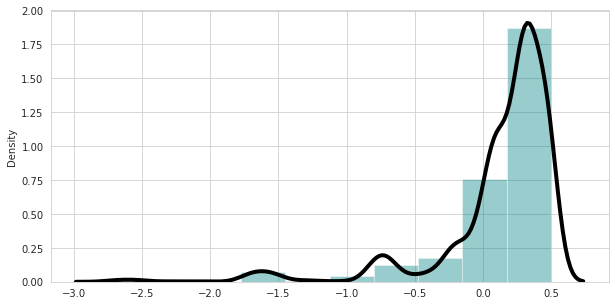

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = p  ,  bins = 10 , kde = True , color = 'teal'
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

In [ ]:
p = p.reshape((p.shape[0],))

In [ ]:
p, lmbda = stats.yeojohnson(p)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


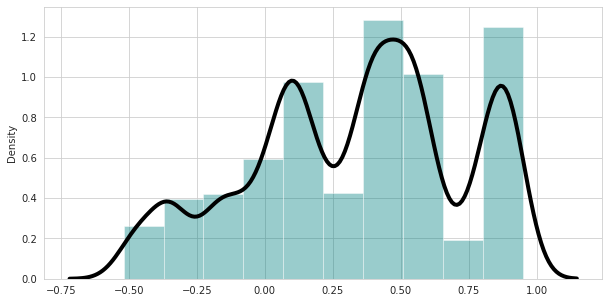

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = p  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

In [ ]:
discount = df[['discount']]
items = df[['no of items']]
price = df[['price']]
profit = df[['profit']]
pd1 = df1[['price_discount']]
pdi = df1[['price_discount_items']]
sp = df1[['selling_price']]
pi = df1[['price_items']]

In [ ]:
discount = discount.to_numpy()
items = items.to_numpy()
price = price.to_numpy()
profit = profit.to_numpy()
pd1 = pd1.to_numpy()
pdi = pdi.to_numpy()
sp = sp.to_numpy()
pi = pi.to_numpy()

Before Box Cox Transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


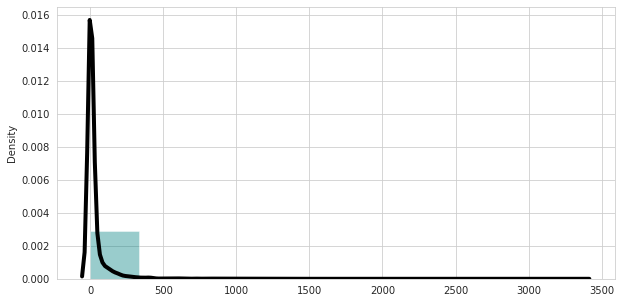

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = pd1  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


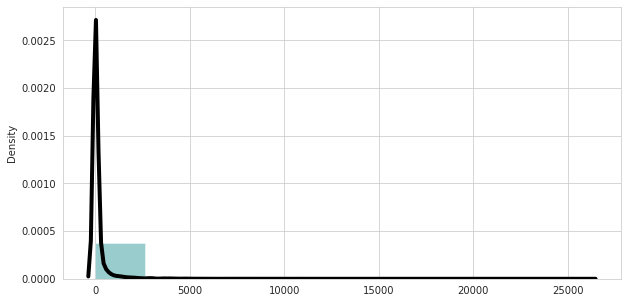

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = pdi  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


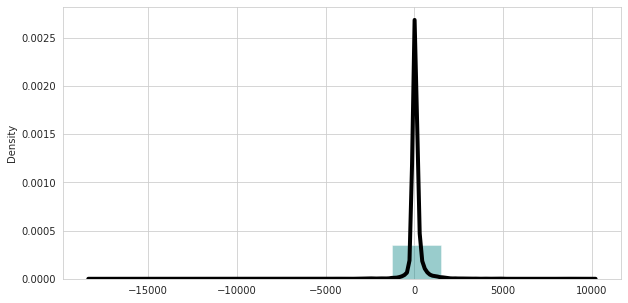

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = sp  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


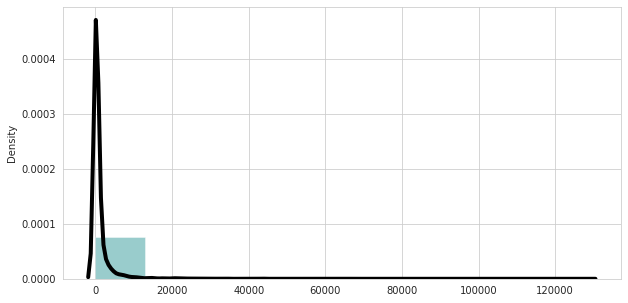

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = pi  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


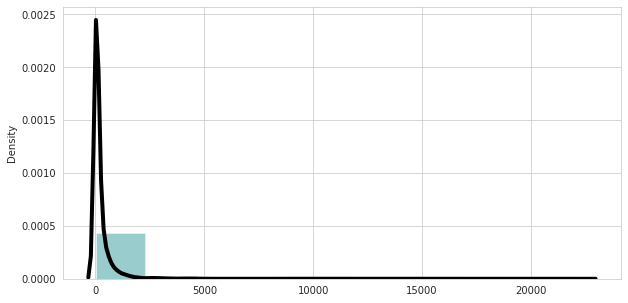

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = price  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


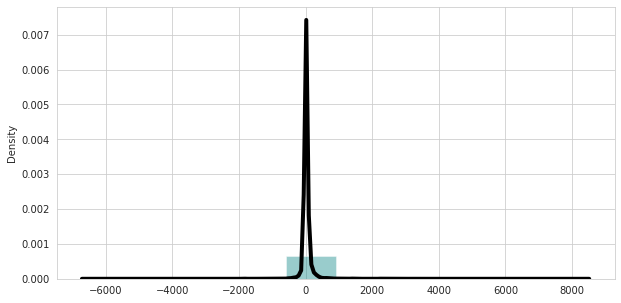

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = profit  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


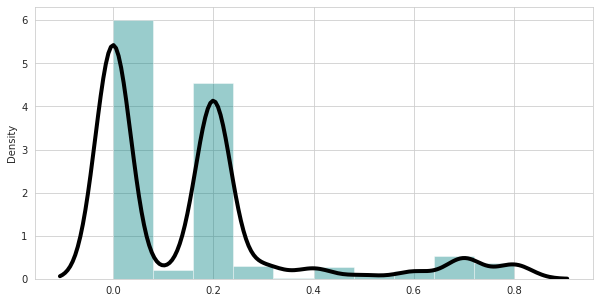

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = discount  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


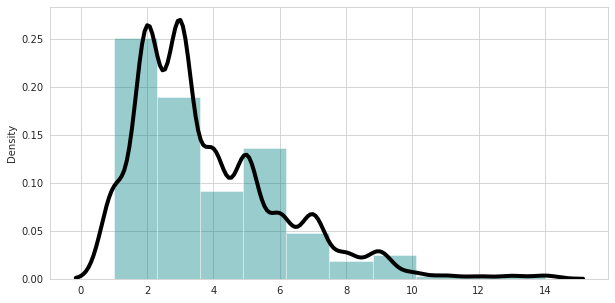

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = items  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

In [ ]:
items = items.reshape((6700,))
discount = discount.reshape((6700,))
price = price.reshape((6700,))
profit = profit.reshape((6700,))
pd1 = pd1.reshape((6697,))
pdi = pdi.reshape((6697,))
sp = sp.reshape((6697,))
pi = pi.reshape((6697,))

After Box Cox Transformation

In [ ]:
items, fitted_lambda = stats.boxcox(items) 
price, lambd = stats.boxcox(price)

In [ ]:
profit, l = stats.yeojohnson(profit)
discount, l = stats.yeojohnson(discount)
pd1, l = stats.yeojohnson(pd1)
pdi, l = stats.yeojohnson(pdi)
sp, l = stats.yeojohnson(sp)
pi, l = stats.yeojohnson(pi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


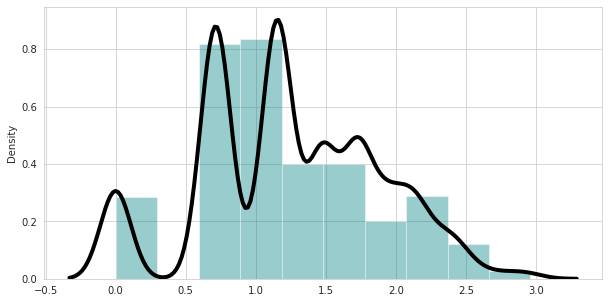

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = items  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


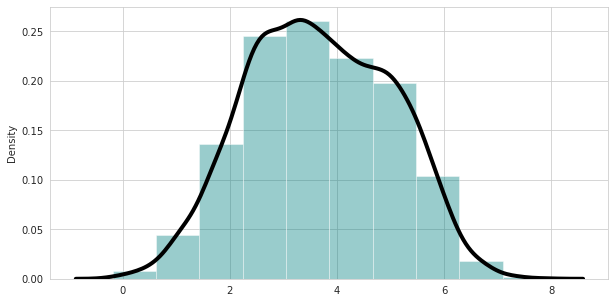

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = price  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


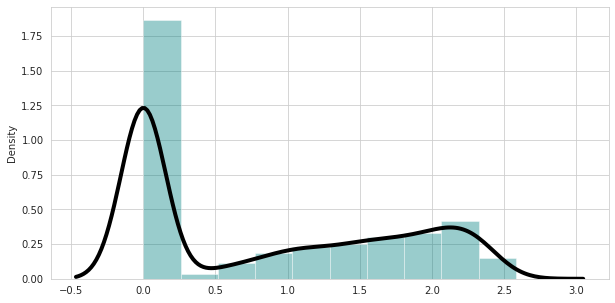

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = pd1  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


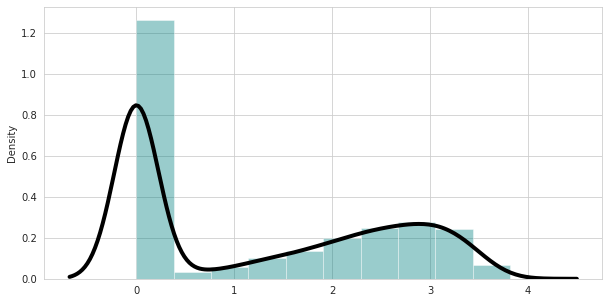

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = pdi  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


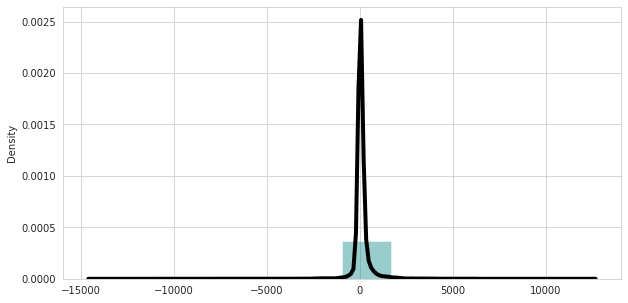

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = sp  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


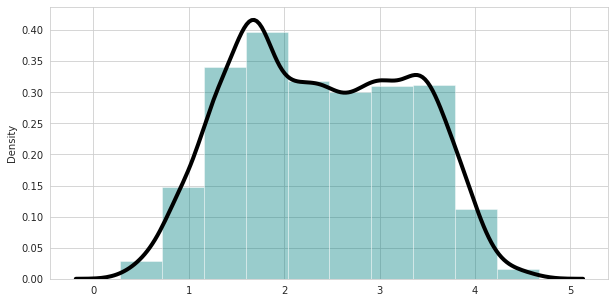

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = pi  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

In [ ]:
pd.DataFrame(profit).describe()

,0
count,6700.000000
mean,26.076694
std,225.052611
min,-7205.500905
25%,1.702595
50%,8.651976
75%,29.175647
max,7674.211764


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


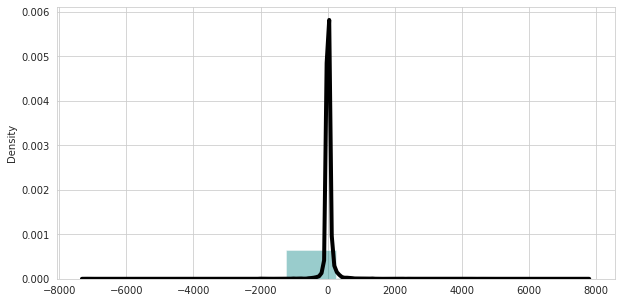

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = profit  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


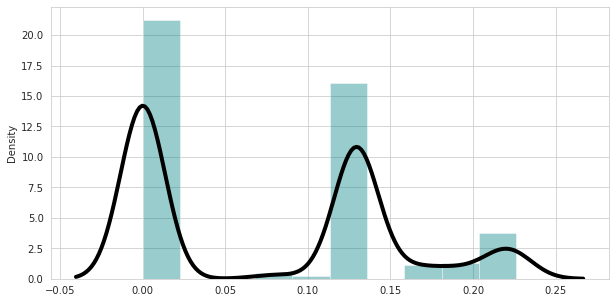

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = discount  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

After Yeo johnson transformation

In [ ]:
discount, lmbda = stats.yeojohnson(discount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


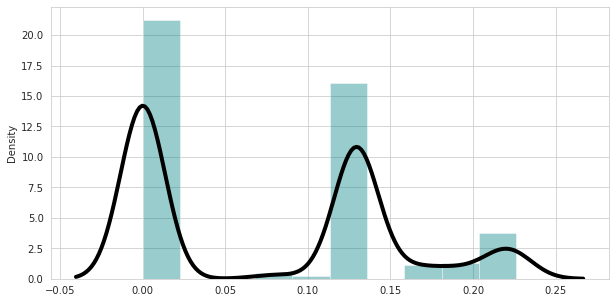

In [ ]:
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = discount  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

In [ ]:
df.describe()

,id,RID,no of items,address code,price,discount,profit
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,3350.500000,4954.381791,3.798507,54719.073284,234.424275,0.155876,29.121046
std,1934.267734,2921.304952,2.225327,32092.421012,641.440815,0.205922,230.712951
min,1.000000,1.000000,1.000000,1040.000000,0.836000,0.000000,-6599.978000
25%,1675.750000,2389.750000,2.000000,22204.000000,17.340000,0.000000,1.713750
50%,3350.500000,4941.500000,3.000000,55113.000000,54.960000,0.200000,8.803200
75%,5025.250000,7507.250000,5.000000,90004.000000,212.940000,0.200000,30.023400
max,6700.000000,9990.000000,14.000000,99301.000000,22638.480000,0.800000,8399.976000


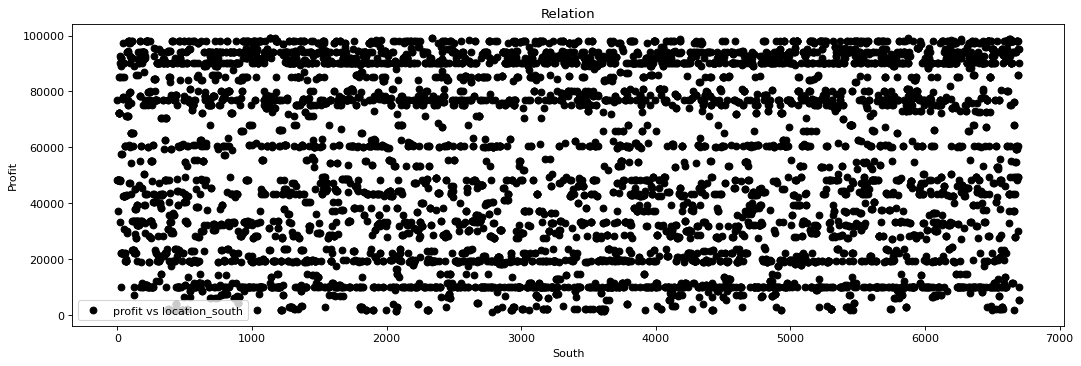

In [ ]:
address = df[["address code"]]
address = address.to_numpy()
x = range(0,6700)
plt.figure(figsize=(16, 5), dpi=80)
plt.scatter(x, address,color = 'black', label='profit vs location_south')
plt.title('Relation')
plt.xlabel('South')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [ ]:
df[df['address code']>90000].shape

(1729, 16)

In [ ]:
df[df['address code']<50000].shape

(3241, 16)

In [ ]:
df[df['address code']>80000].shape

(2104, 16)